# TP1 - Aprendizaje Automático 
### Alejo Ordoñez - 108397

## 1

In [1]:
import numpy as np
import os
from skimage import io
import matplotlib.pyplot as plt
import random

In [2]:
imagenes = []
archivos = os.listdir('imágenes')
max_dimensiones = [0, 0]
for archivo in archivos:
    imagen = np.where(io.imread('imágenes/'+archivo) > 0, 1, -1)
    if imagen.shape[0] > max_dimensiones[0]:
        max_dimensiones[0] = imagen.shape[0]
    if imagen.shape[1] > max_dimensiones[1]:
        max_dimensiones[1] = imagen.shape[1]
    imagenes.append(imagen)
# igualo las dimensiones de las imágenes para poder entrenar la red
imagenes_redimensionadas = []
for imagen in imagenes:
    imagen_redimensionada = np.ones((max_dimensiones[0], max_dimensiones[1]), dtype=imagen.dtype)
    defase_y = (max_dimensiones[0] - imagen.shape[0]) // 2
    defase_x = (max_dimensiones[1] - imagen.shape[1]) // 2
    imagen_redimensionada[defase_y:defase_y + imagen.shape[0], defase_x:defase_x + imagen.shape[1]] = imagen
    imagenes_redimensionadas.append(imagen_redimensionada)
imagenes = imagenes_redimensionadas

In [3]:
def mostrar_imagenes(imagenes, filas=2, columnas=3):
    fig, axes = plt.subplots(filas, columnas, figsize=(15, 5 * filas))
    axes = axes.flatten()
    for i, imagen in enumerate(imagenes):
        axes[i].imshow(imagen, cmap='gray', vmin=-1, vmax=1)
        axes[i].axis('off')
    for j in range(i + 1, filas * columnas):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

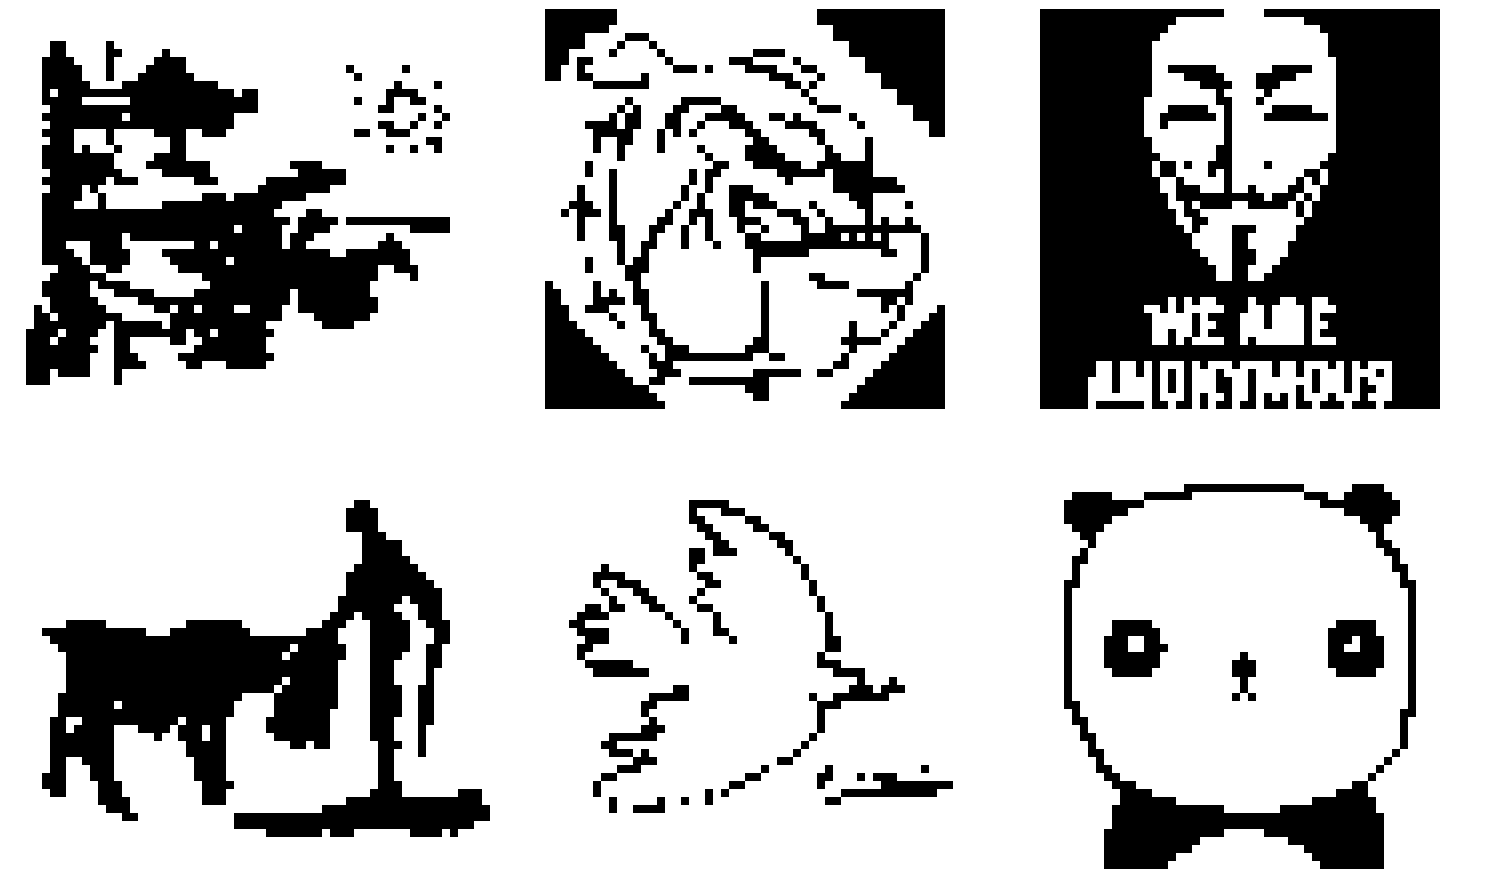

In [4]:
mostrar_imagenes(imagenes)

In [6]:
class Hopfield:
    def __init__(self, tamaño):
        self.tamaño = tamaño
        self.pesos = np.zeros((tamaño, tamaño))

    def entrenar(self, patrones):
        for patron in patrones:
            p = patron.flatten()
            self.pesos += np.outer(p, p)
        np.fill_diagonal(self.pesos, 0)

    def recuperar(self, patron, max_iteraciones=100):
        p = patron.flatten()
        for _ in range(max_iteraciones):
            for i in range(self.tamaño):
                h = np.dot(self.pesos[i], p)
                p[i] = -1 if h < 0 else 1
        return p.reshape(patron.shape)


In [7]:
hopfield = Hopfield(max_dimensiones[0]*max_dimensiones[1])
hopfield.entrenar(imagenes[:3])

## 1.a

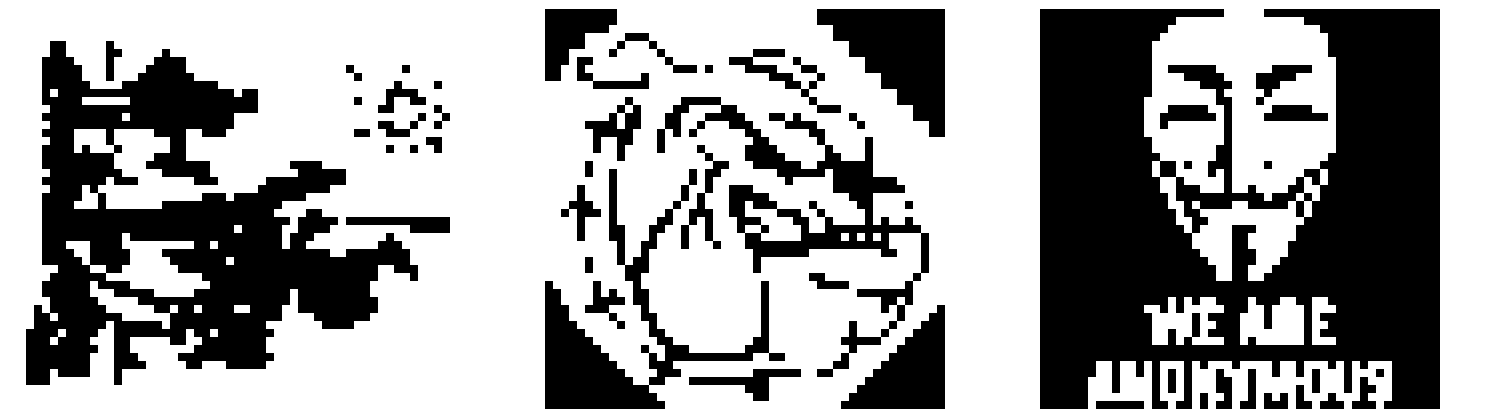

In [8]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes[:3]]
mostrar_imagenes(imagenes_recuperadas, 1, 3)

## 1.b

In [9]:
def agregar_ruido(imagen, cant_ruido=0.5):
    imagen_ruidosa = imagen.copy()
    cant_pixeles_corrompidos = int(cant_ruido * imagen.size)
    pixeles_corrompidos = [(random.randint(0, imagen.shape[0]-1), random.randint(0, imagen.shape[1]-1)) for _ in range(cant_pixeles_corrompidos)]
    for pixel in pixeles_corrompidos:
        imagen_ruidosa[pixel] = 1 if imagen_ruidosa[pixel] == -1 else -1
    return imagen_ruidosa

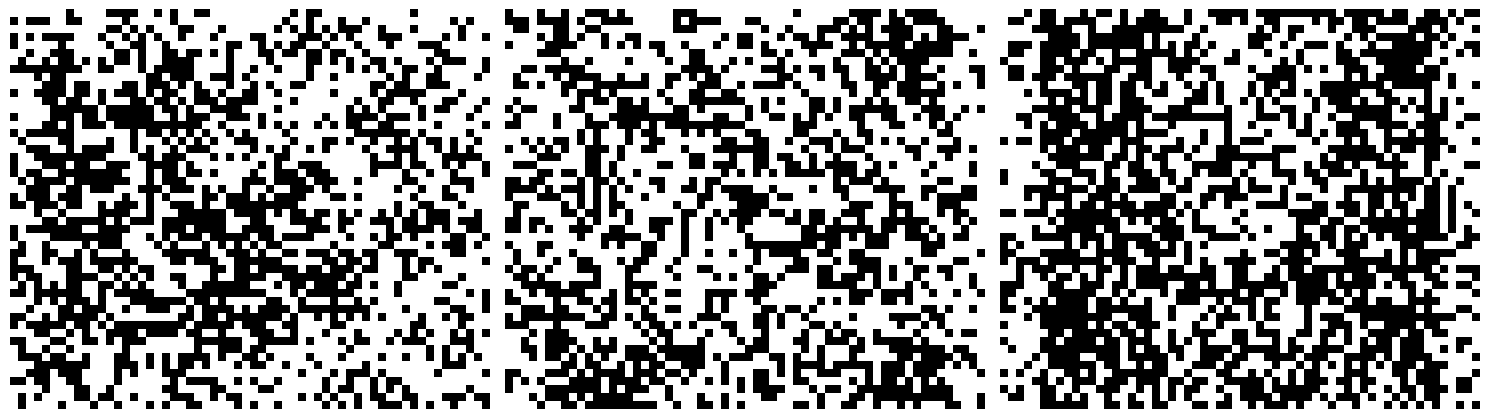

In [10]:
imagenes_con_ruido = [agregar_ruido(imagen) for imagen in imagenes[:3]]
mostrar_imagenes(imagenes_con_ruido, 1, 3)

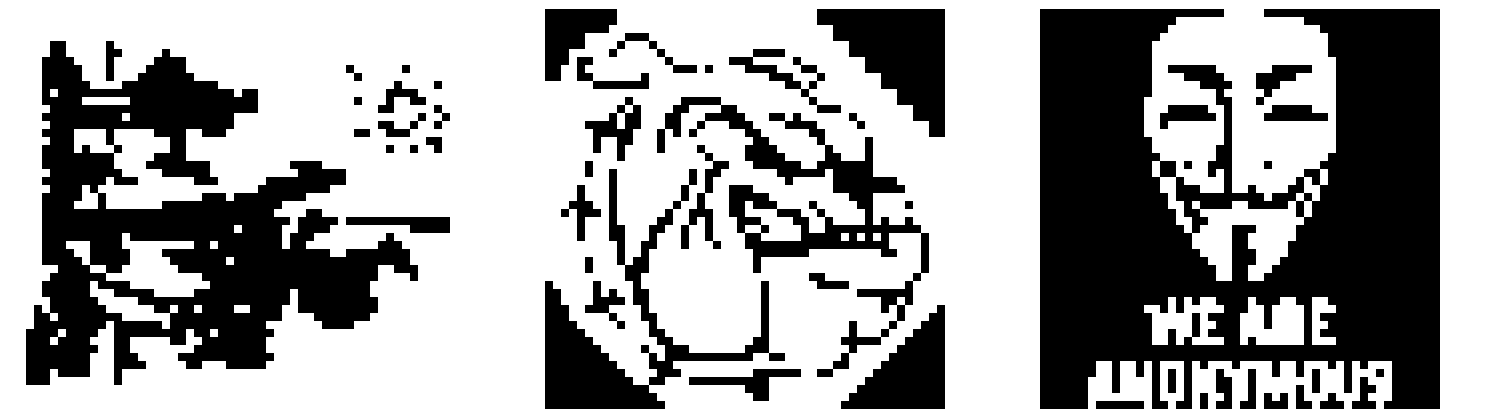

In [11]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes_con_ruido]
mostrar_imagenes(imagenes_recuperadas, 1, 3)

In [12]:
def remover_cuadrados(imagen, tamaño_cuadrado=0.4):
    imagen_con_cuadrados_removidos = imagen.copy()
    area_cuadrado = int(tamaño_cuadrado * imagen.shape[0] * imagen.shape[1])
    lado_cuadrado = int(np.sqrt(area_cuadrado))
    posicion_y = random.randint(0, imagen.shape[0] - lado_cuadrado)
    posicion_x = random.randint(0, imagen.shape[1] - lado_cuadrado)
    imagen_con_cuadrados_removidos[posicion_y:posicion_y + lado_cuadrado, posicion_x:posicion_x + lado_cuadrado] = 1
    return imagen_con_cuadrados_removidos

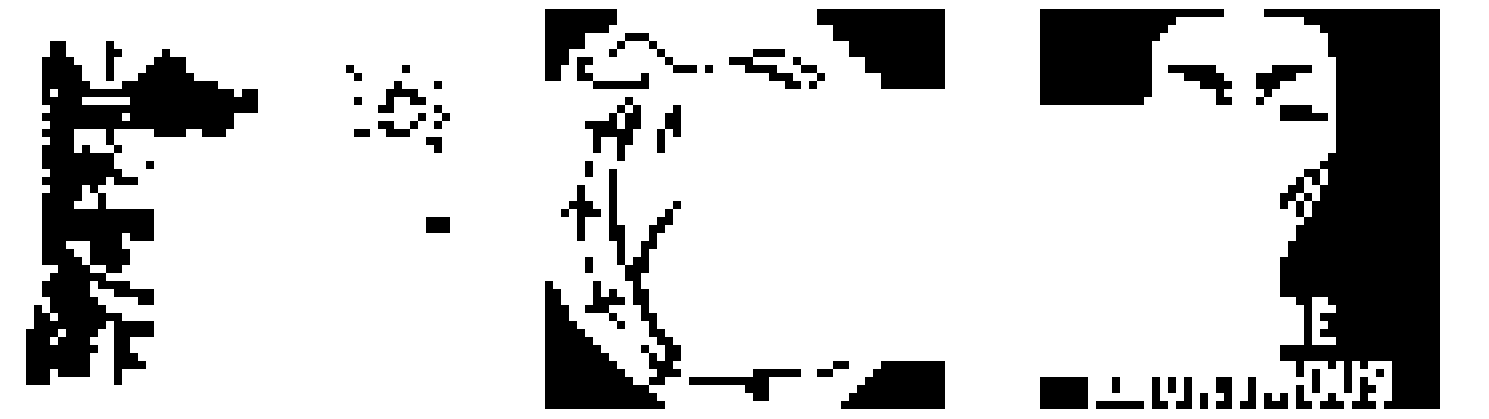

In [17]:
imagenes_con_cuadrados_removidos = [remover_cuadrados(imagen) for imagen in imagenes[:3]]
mostrar_imagenes(imagenes_con_cuadrados_removidos, 1, 3)

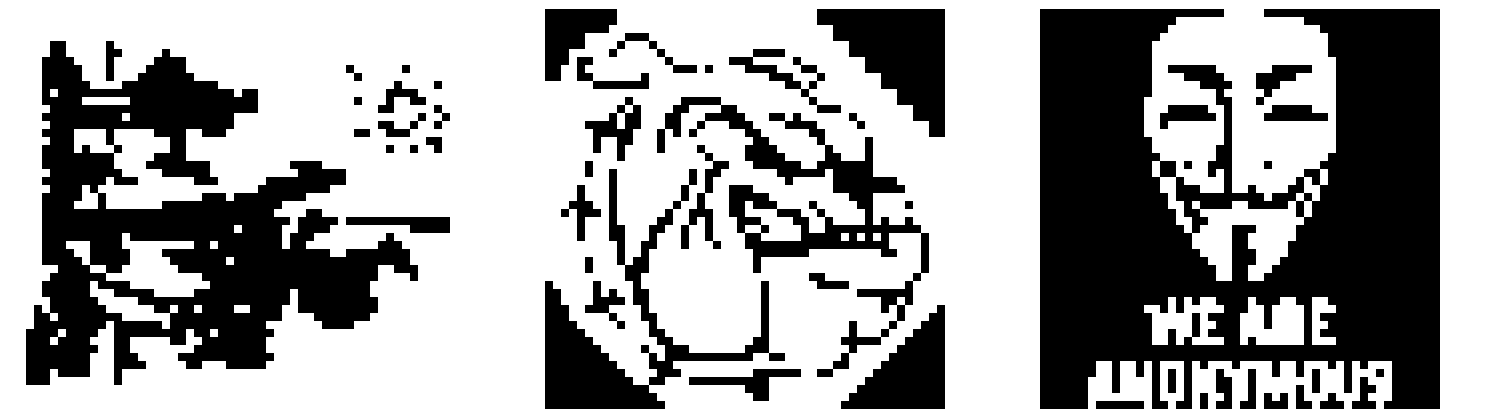

In [18]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes_con_cuadrados_removidos]
mostrar_imagenes(imagenes_recuperadas, 1, 3)

In [19]:
def rotar(imagen, rotaciones_antihorarias=2):
    return np.rot90(imagen, rotaciones_antihorarias)

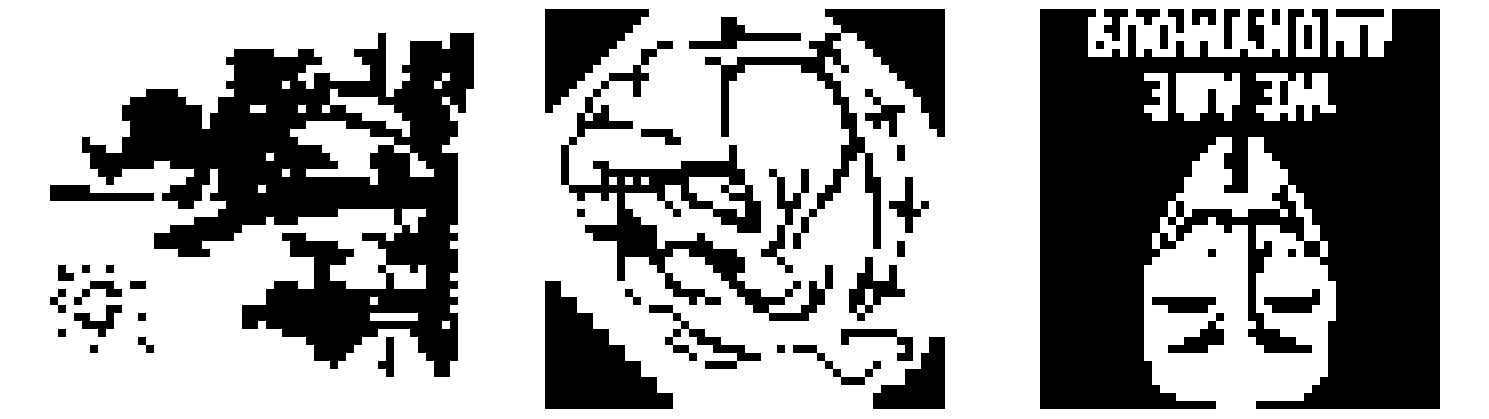

In [20]:
imagenes_rotadas = [rotar(imagen) for imagen in imagenes[:3]]
mostrar_imagenes(imagenes_rotadas, 1, 3)

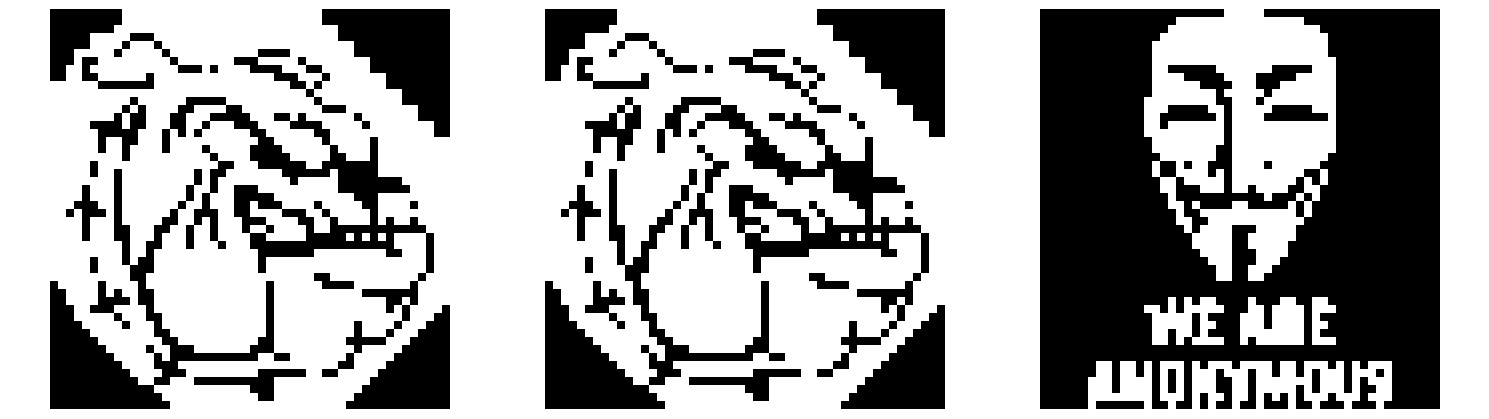

In [21]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes_rotadas]
mostrar_imagenes(imagenes_recuperadas, 1, 3)

## 1.c

In [22]:
def invertir(imagen):
    return imagen * -1

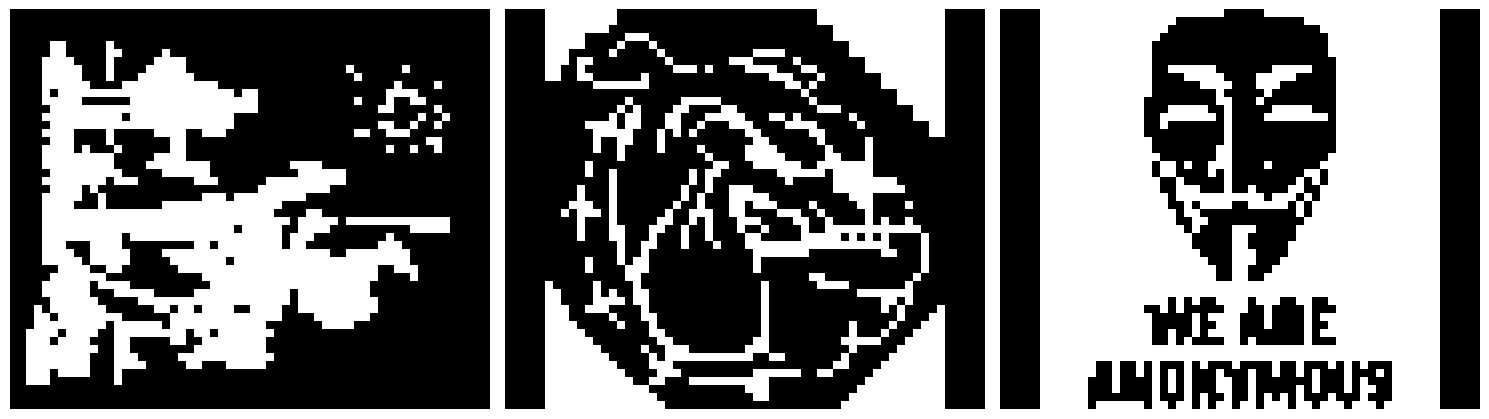

In [23]:
imagenes_invertidas = [invertir(imagen) for imagen in imagenes[:3]]
mostrar_imagenes(imagenes_invertidas, 1, 3)

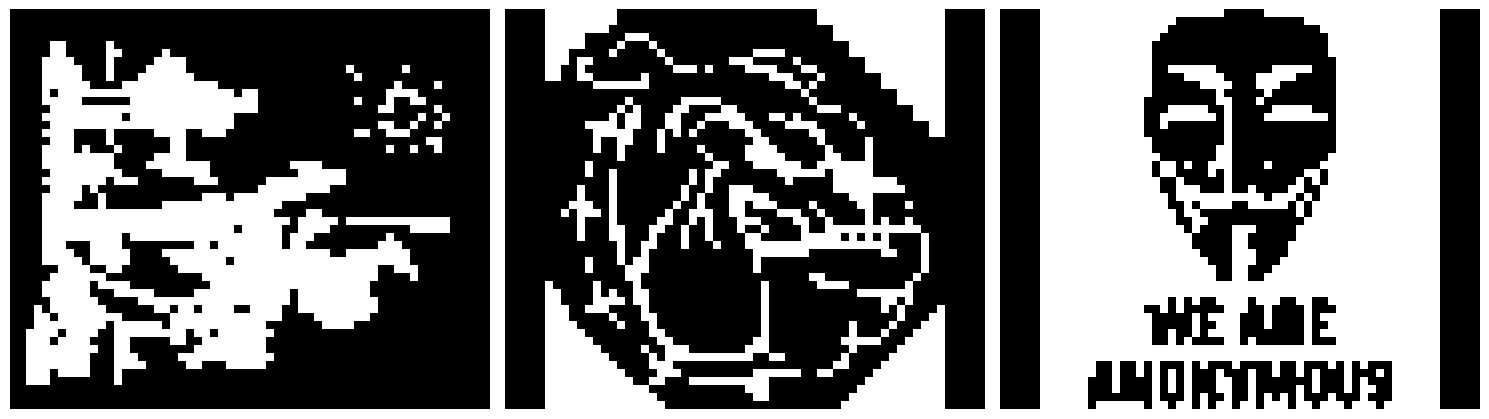

In [24]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes_invertidas]
mostrar_imagenes(imagenes_recuperadas, 1, 3)

In [25]:
def combinar_imagenes(imagenes):
    imagenes_combinadas = []
    for _ in range(len(imagenes)):
        imagen_combinada = np.zeros((imagenes[0].shape[0], imagenes[0].shape[1]))
        for imagen in imagenes:
            imagen_combinada += random.random() * imagen
        imagenes_combinadas.append(imagen_combinada)
    return imagenes_combinadas

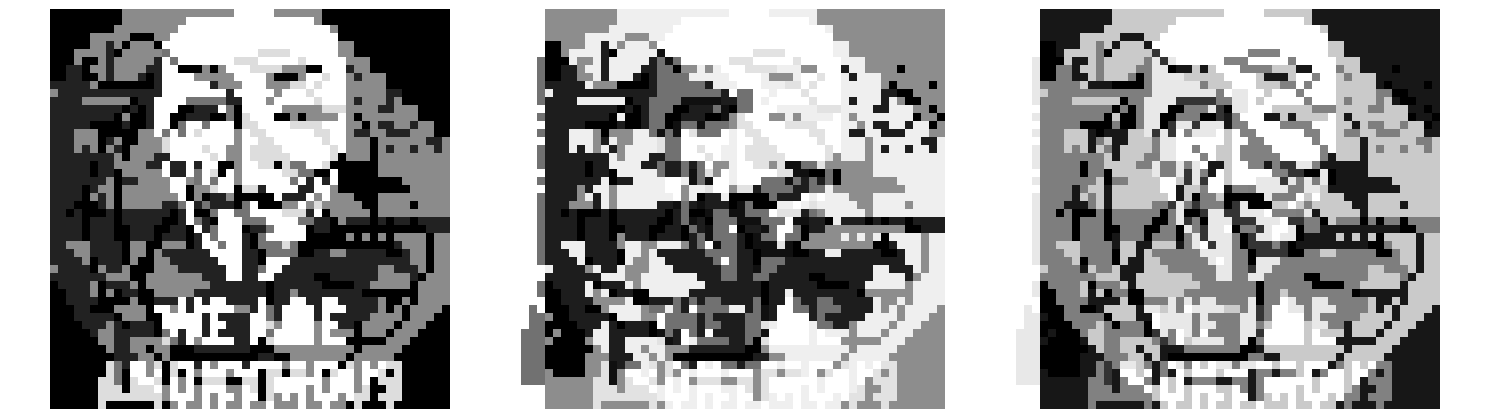

In [26]:
imagenes_combinadas = combinar_imagenes(imagenes[:3])
mostrar_imagenes(imagenes_combinadas, 1, 3)

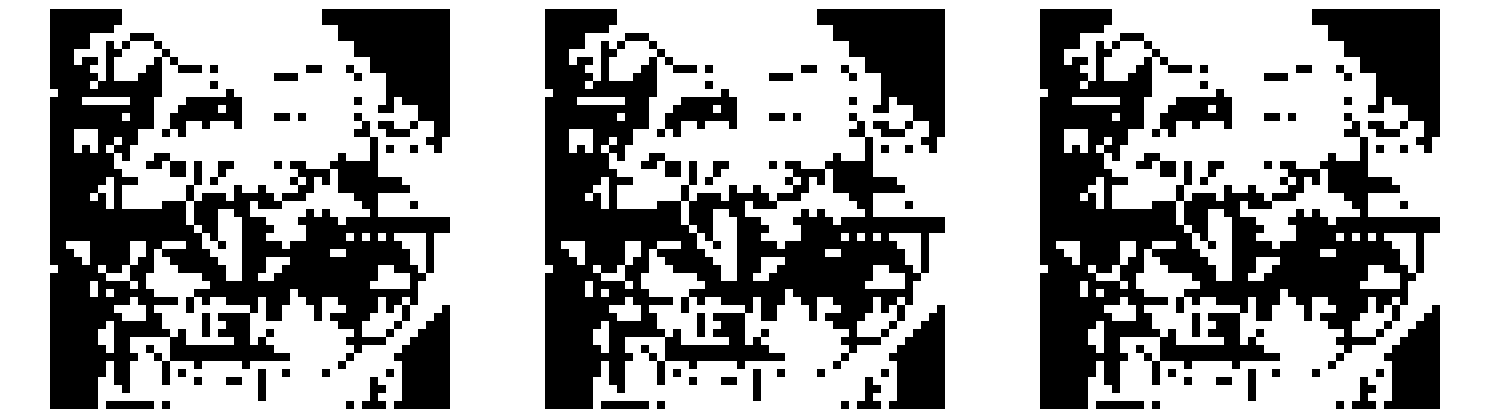

In [27]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes_combinadas]
mostrar_imagenes(imagenes_recuperadas, 1, 3)

## 1.d

In [28]:
hopfield = Hopfield(max_dimensiones[0]*max_dimensiones[1])
hopfield.entrenar(imagenes)

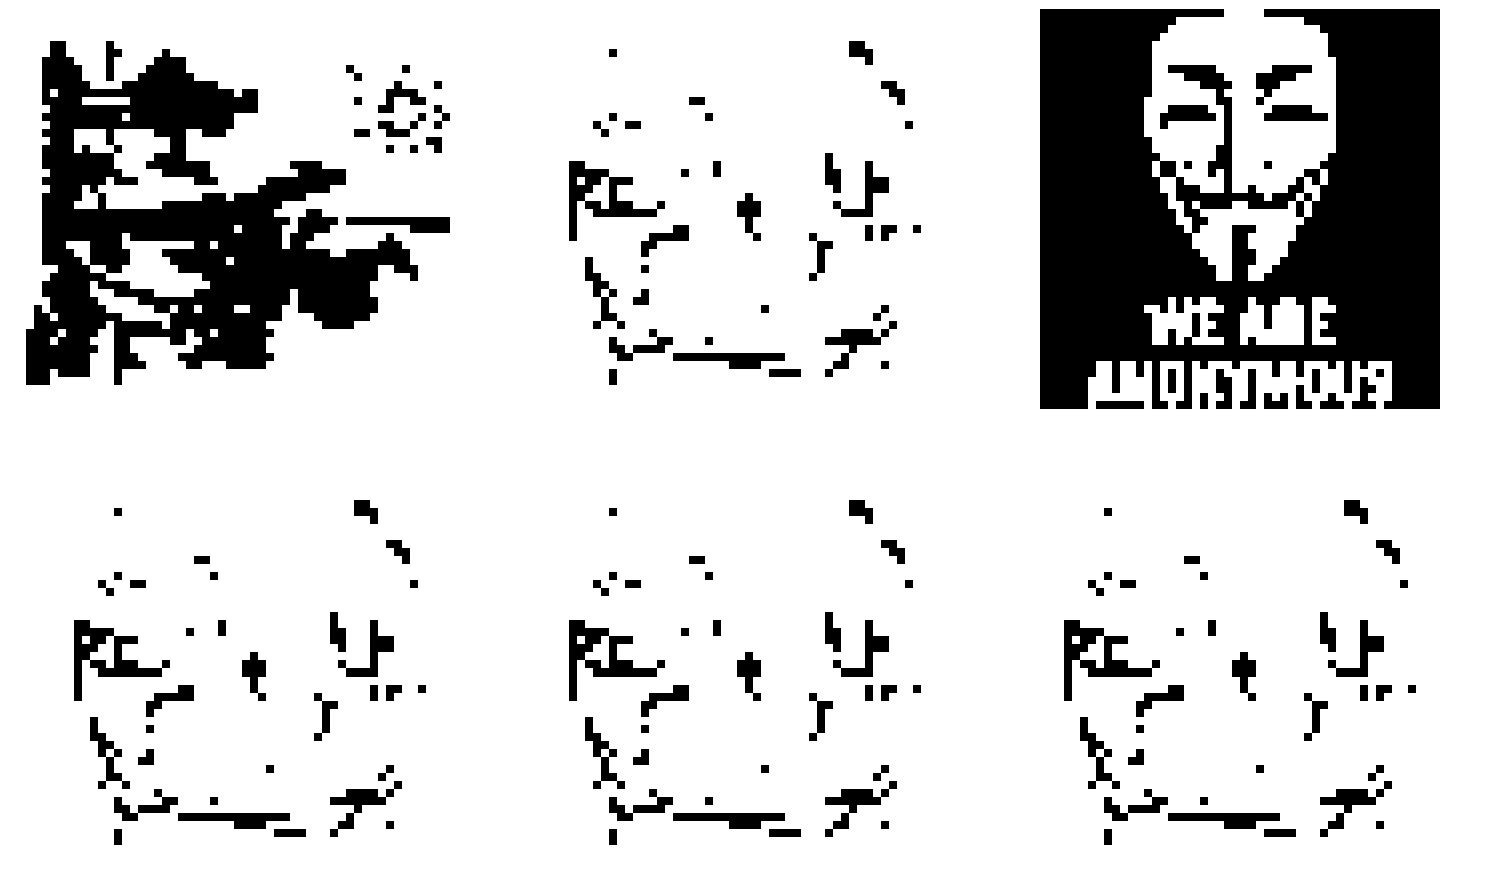

In [29]:
imagenes_recuperadas = [hopfield.recuperar(imagen) for imagen in imagenes]
mostrar_imagenes(imagenes_recuperadas, 2, 3)

## 2.a

In [30]:
def patron_pseudo_aleatorio(tamaño):
    return np.random.choice([-1, 1], size=tamaño)

def max_patrones_pseudoaleatorios_hopfield(tamaño, p_error):
    patrones = [patron_pseudo_aleatorio(tamaño)]
    max_patrones = 0
    
    while True:
        hopfield = Hopfield(tamaño)
        hopfield.entrenar(patrones)
        patrones_recuperados = [hopfield.recuperar(patron) for patron in patrones]
        recuperados = sum(np.array_equal(patrones_recuperados[i], patrones[i]) for i in range(len(patrones)))
        if recuperados / len(patrones) <= 1 - p_error:
            return max_patrones / tamaño
        patrones.append(patron_pseudo_aleatorio(tamaño))
        max_patrones += 1

In [31]:
probabilidades = [.001, .0036, .01, .05, .1]
for probabilidad in probabilidades:
    print(probabilidad, max_patrones_pseudoaleatorios_hopfield(100, probabilidad))

0.001 0.13
0.0036 0.13
0.01 0.1
0.05 0.12
0.1 0.12


## 2.b

In [32]:
def agregar_ruido(patron, cant_ruido=0.5):
    patron_ruidoso = patron.copy()
    cant_indices_corrompidos = int(cant_ruido * patron.size)
    indices_corrompidos = [random.randint(0, patron.shape[0]-1) for _ in range(cant_indices_corrompidos)]
    for i in indices_corrompidos:
        patron_ruidoso[i] *= -1
    return patron_ruidoso

def patron_correlacionado(patron_original, correlacion):
    return agregar_ruido(patron_original, 1 - correlacion)

In [33]:
def max_patrones_pseudoaleatorios_hopfield(tamaño, p_error):
    patrones = [patron_pseudo_aleatorio(tamaño)]
    max_patrones = 0
    
    while True:
        hopfield = Hopfield(tamaño)
        hopfield.entrenar(patrones)
        patrones_recuperados = [hopfield.recuperar(patron) for patron in patrones]
        recuperados = sum(np.array_equal(patrones_recuperados[i], patrones[i]) for i in range(len(patrones)))
        if recuperados / len(patrones) <= 1 - p_error:
            return max_patrones / tamaño
        patrones.append(patron_correlacionado(patrones[len(patrones)-1], .8))
        max_patrones += 1

In [34]:
probabilidades = [.001, .0036, .01, .05, .1]
for probabilidad in probabilidades:
    print(probabilidad, max_patrones_pseudoaleatorios_hopfield(100, probabilidad))

0.001 0.02
0.0036 0.02
0.01 0.02
0.05 0.02
0.1 0.02
